In [702]:
# installing and importing relevant libraries and packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

from scipy import stats

import sklearn
import sklearn.model_selection as model_selection
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import statsmodels.api as sm

!pip install regressors

You should consider upgrading via the 'pip install --upgrade pip' command.


In [631]:
# importing the file and creating a pandas dataframe

four_factors_xlsx = pd.read_excel('four_factors_all_seasons.xlsx')
four_factors = pd.DataFrame(four_factors_xlsx)

In [632]:
# basic data exploration

four_factors.head()

,Team,Season,WINS,MOV,NRTG,eFG%,TOV%,OREB%,FTF,OPPeFG%,OPPTOV%,DREB%,OPPFTF
0,Milwaukee Bucks,2018 - 2019,60.0,8.87,8.6,0.550,12.0,20.8,0.197,0.503,11.5,80.3,0.162
1,Toronto Raptors,2018 - 2019,58.0,6.09,6.0,0.543,12.4,21.9,0.198,0.509,13.1,77.1,0.190
2,Golden State Warriors,2018 - 2019,57.0,6.46,6.4,0.565,12.6,22.5,0.182,0.508,11.7,77.1,0.205
3,Denver Nuggets,2018 - 2019,54.0,3.95,4.1,0.527,11.9,26.6,0.175,0.521,12.3,78.0,0.194
4,Houston Rockets,2018 - 2019,53.0,4.77,4.8,0.542,12.0,22.8,0.221,0.525,13.4,74.4,0.210


In [633]:
four_factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 13 columns):
Team       330 non-null object
Season     330 non-null object
WINS       330 non-null float64
MOV        330 non-null float64
NRTG       330 non-null float64
eFG%       330 non-null float64
TOV%       330 non-null float64
OREB%      330 non-null float64
FTF        330 non-null float64
OPPeFG%    330 non-null float64
OPPTOV%    330 non-null float64
DREB%      330 non-null float64
OPPFTF     330 non-null float64
dtypes: float64(11), object(2)
memory usage: 33.6+ KB


In [634]:
four_factors.describe()

,WINS,MOV,NRTG,eFG%,TOV%,OREB%,FTF,OPPeFG%,OPPTOV%,DREB%,OPPFTF
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,40.996970,0.000394,0.009697,0.503824,13.240000,25.072727,0.212291,0.503691,13.239091,74.923333,0.212121
std,12.722090,4.664150,4.907995,0.021385,0.943949,2.834371,0.025591,0.018716,1.057590,2.332752,0.024982
min,8.696970,-13.910000,-15.200000,0.439000,10.700000,18.000000,0.143000,0.450000,10.500000,68.100000,0.100000
25%,31.295455,-3.260000,-3.475000,0.489000,12.600000,23.100000,0.195000,0.491000,12.600000,73.300000,0.194000
50%,42.000000,0.245000,0.250000,0.502000,13.200000,25.100000,0.210000,0.505000,13.200000,74.800000,0.211000
75%,50.000000,3.432500,3.600000,0.518750,13.900000,27.200000,0.228000,0.516000,13.900000,76.400000,0.227000
max,73.000000,11.630000,11.600000,0.569000,16.000000,32.600000,0.299000,0.564000,16.300000,81.200000,0.315000


In [635]:
# making sure I remember how to index correctly

a = [1,2,3,4,5]
print(a[:3])
print(a[3:])

[1, 2, 3]
[4, 5]


In [636]:
# separating the features and target variable

x = pd.DataFrame(four_factors.iloc[:,5:])
y_wins = pd.DataFrame(four_factors.iloc[:,2:3])

In [637]:
# scaling data to get the four factors into the same unit 

# ignore cell

x.loc[:,'eFG%'] *= 100
x.loc[:,'FTF'] *= 100
x.loc[:,'OPPeFG%'] *= 100
x.loc[:,'OPPFTF'] *= 100


In [638]:
# confirming the features are correctly attributed

print(x.describe())

             eFG%        TOV%       OREB%         FTF     OPPeFG%     OPPTOV%  \
count  330.000000  330.000000  330.000000  330.000000  330.000000  330.000000   
mean    50.382424   13.240000   25.072727   21.229091   50.369091   13.239091   
std      2.138529    0.943949    2.834371    2.559113    1.871580    1.057590   
min     43.900000   10.700000   18.000000   14.300000   45.000000   10.500000   
25%     48.900000   12.600000   23.100000   19.500000   49.100000   12.600000   
50%     50.200000   13.200000   25.100000   21.000000   50.500000   13.200000   
75%     51.875000   13.900000   27.200000   22.800000   51.600000   13.900000   
max     56.900000   16.000000   32.600000   29.900000   56.400000   16.300000   

            DREB%      OPPFTF  
count  330.000000  330.000000  
mean    74.923333   21.212121  
std      2.332752    2.498189  
min     68.100000   10.000000  
25%     73.300000   19.400000  
50%     74.800000   21.100000  
75%     76.400000   22.700000  
max     81.200

In [639]:
# confirming the target variable is correctly attributed

print(y_wins.head(20))

    WINS
0   60.0
1   58.0
2   57.0
3   54.0
4   53.0
5   53.0
6   51.0
7   50.0
8   49.0
9   49.0
10  48.0
11  48.0
12  48.0
13  42.0
14  42.0
15  41.0
16  39.0
17  39.0
18  39.0
19  37.0


In [640]:
# prep a dataframe for exploratory data analysis

eda_data = pd.concat([x, y_wins], axis=1) 

In [641]:
eda_data.head(10)

,eFG%,TOV%,OREB%,FTF,OPPeFG%,OPPTOV%,DREB%,OPPFTF,WINS
0,55.0,12.0,20.8,19.7,50.3,11.5,80.3,16.2,60.0
1,54.3,12.4,21.9,19.8,50.9,13.1,77.1,19.0,58.0
2,56.5,12.6,22.5,18.2,50.8,11.7,77.1,20.5,57.0
3,52.7,11.9,26.6,17.5,52.1,12.3,78.0,19.4,54.0
4,54.2,12.0,22.8,22.1,52.5,13.4,74.4,21.0,53.0
5,52.8,12.1,26.6,21.0,51.6,11.0,77.9,19.5,53.0
6,53.2,12.9,24.5,24.1,51.2,11.1,78.6,20.6,51.0
7,53.8,13.4,22.9,21.7,50.7,12.4,80.3,18.9,50.0
8,53.4,11.5,21.6,17.3,51.4,13.4,77.0,19.8,49.0
9,51.4,11.7,26.0,19.0,52.3,14.4,78.2,20.6,49.0


In [718]:
# pandas testing

eda_data.iloc[:,0:8]

,eFG%,TOV%,OREB%,FTF,OPPeFG%,OPPTOV%,DREB%,OPPFTF
0,55.0,12.0,20.8,19.7,50.3,11.5,80.3,16.2
1,54.3,12.4,21.9,19.8,50.9,13.1,77.1,19.0
2,56.5,12.6,22.5,18.2,50.8,11.7,77.1,20.5
3,52.7,11.9,26.6,17.5,52.1,12.3,78.0,19.4
4,54.2,12.0,22.8,22.1,52.5,13.4,74.4,21.0
5,52.8,12.1,26.6,21.0,51.6,11.0,77.9,19.5
6,53.2,12.9,24.5,24.1,51.2,11.1,78.6,20.6
7,53.8,13.4,22.9,21.7,50.7,12.4,80.3,18.9
8,53.4,11.5,21.6,17.3,51.4,13.4,77.0,19.8
9,51.4,11.7,26.0,19.0,52.3,14.4,78.2,20.6


In [711]:
eda_data.iloc[:,8:9]

,WINS
0,60.0
1,58.0
2,57.0
3,54.0
4,53.0
5,53.0
6,51.0
7,50.0
8,49.0
9,49.0


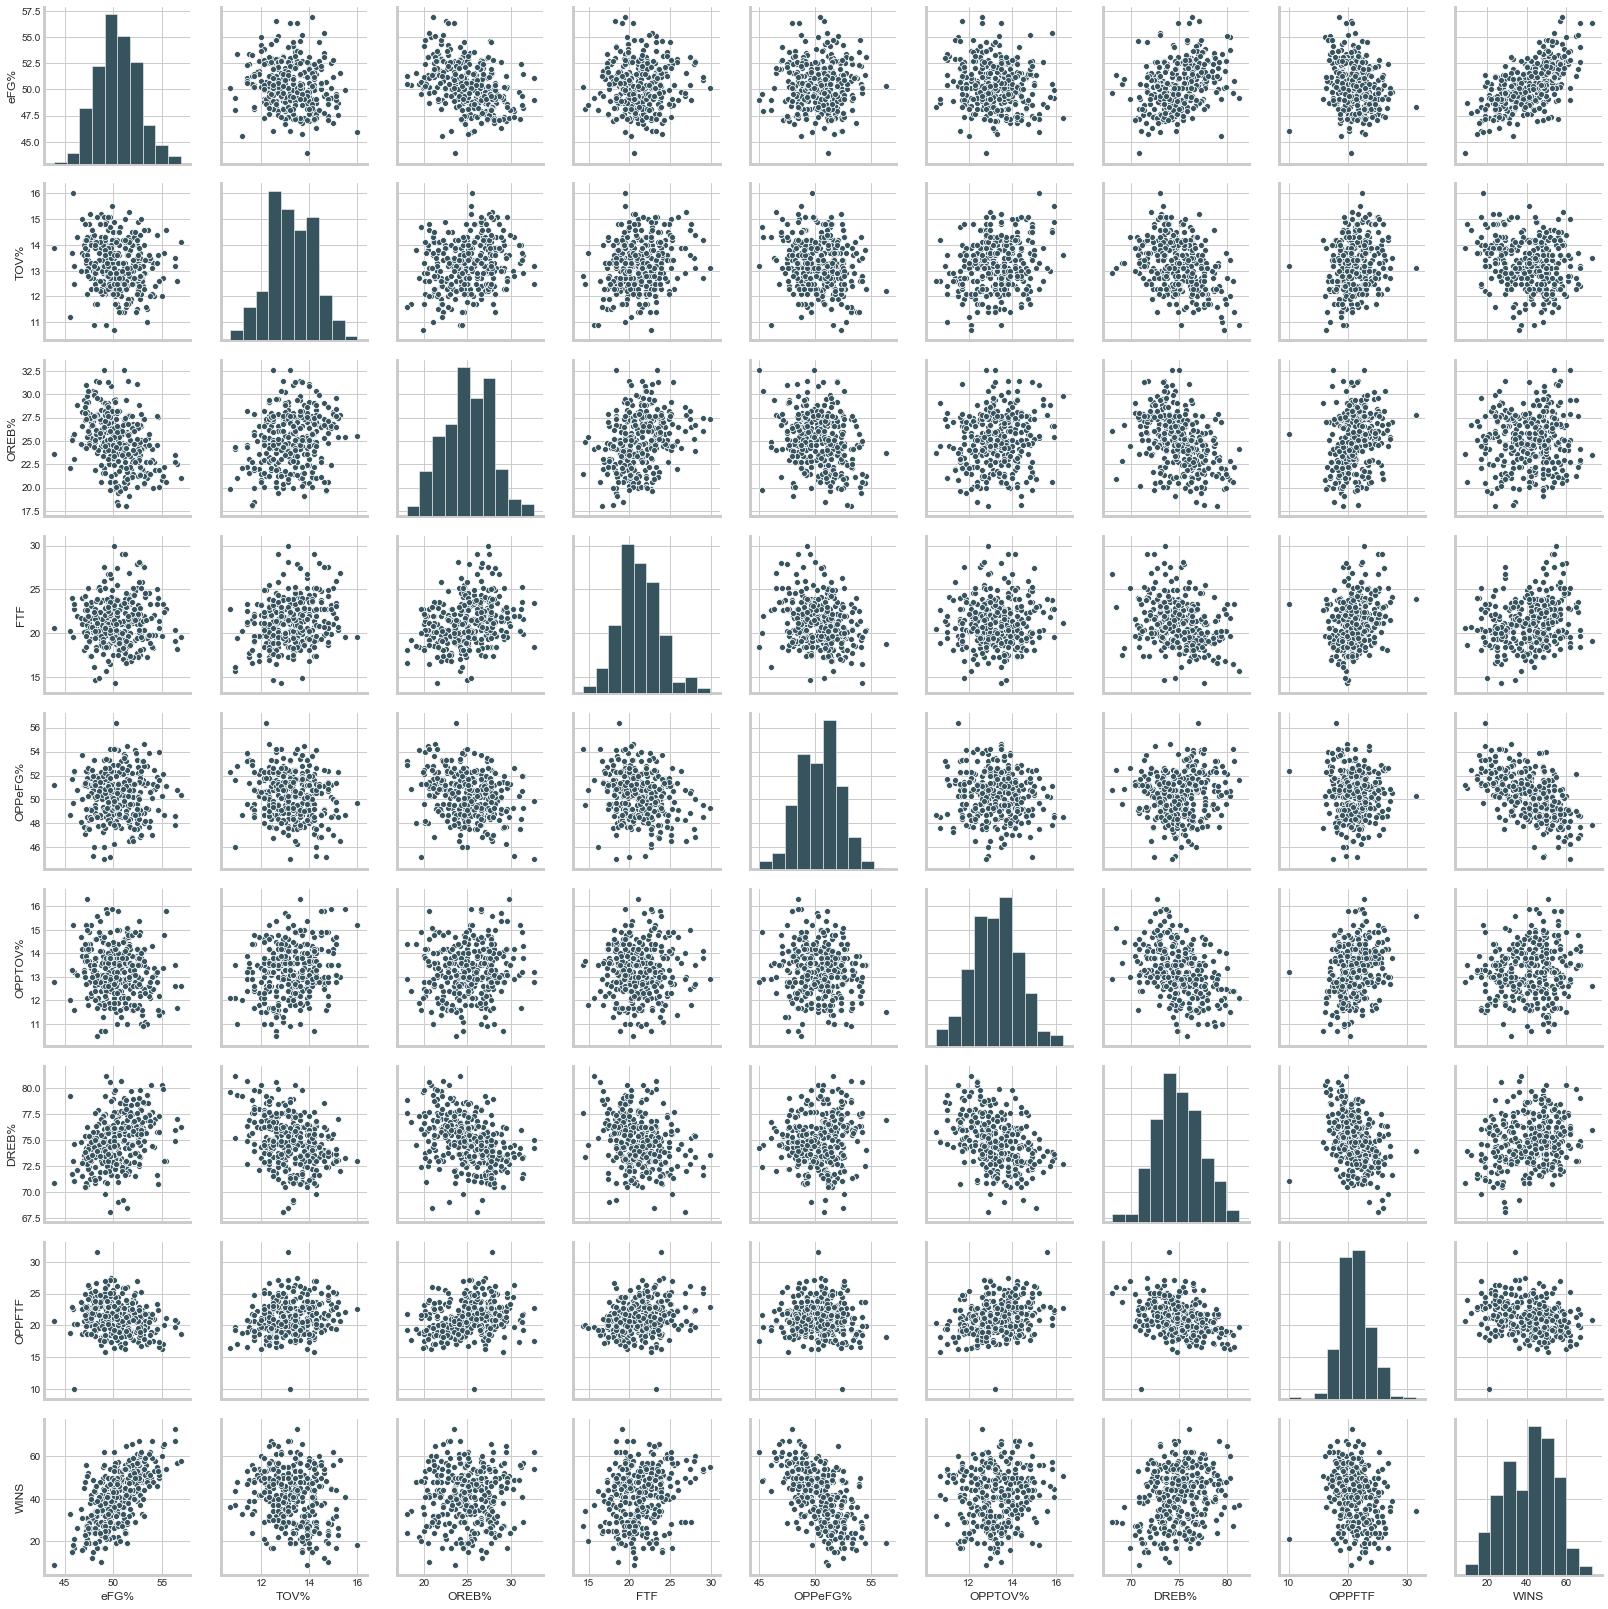

In [725]:
# exploring the relationship of all of the selected features with a pairplot

sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

pairplot = sns.pairplot(eda_data)
pairplot
pairplot.savefig("pairplot.png")

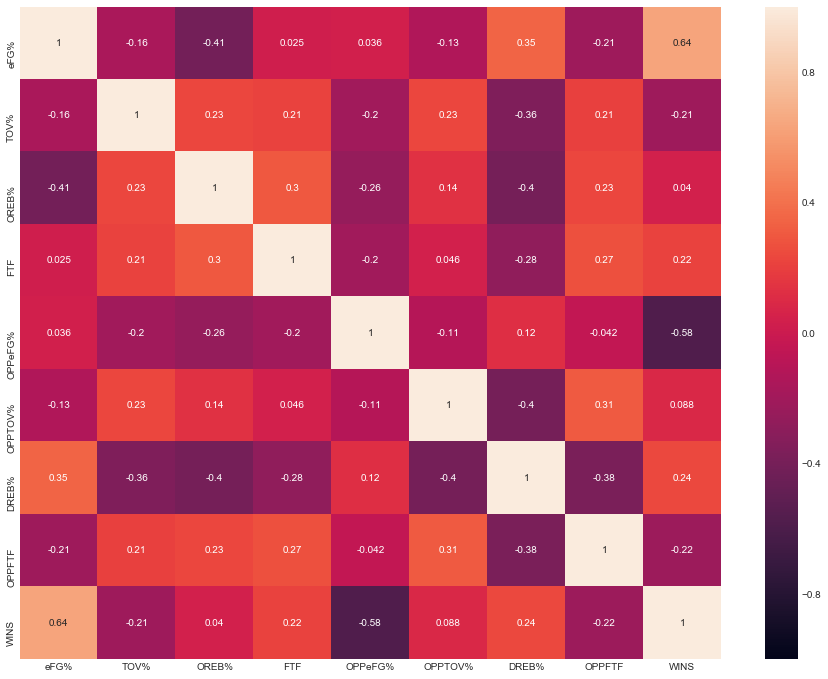

In [730]:
# exploring the correlation of all of the selected features with a heatmap

fig,ax=plt.subplots(figsize=(14,12))
heatmap = sns.heatmap(eda_data.corr(), annot=True, vmin=-1, vmax=1)
heatmap
fig.savefig("heatmap.png")

In [647]:
# correlation data in table form

corr_table = eda_data[:-1].corr()
corr_table

,eFG%,TOV%,OREB%,FTF,OPPeFG%,OPPTOV%,DREB%,OPPFTF,WINS
eFG%,1.000000,-0.161003,-0.409089,0.028136,0.037785,-0.132312,0.346290,-0.211528,0.635585
TOV%,-0.161003,1.000000,0.235527,0.210252,-0.200763,0.232890,-0.351281,0.202125,-0.209184
OREB%,-0.409089,0.235527,1.000000,0.302276,-0.256244,0.136992,-0.404912,0.232967,0.038616
FTF,0.028136,0.210252,0.302276,1.000000,-0.205556,0.047466,-0.270648,0.261969,0.227858
OPPeFG%,0.037785,-0.200763,-0.256244,-0.205556,1.000000,-0.104881,0.130263,-0.050504,-0.578827
OPPTOV%,-0.132312,0.232890,0.136992,0.047466,-0.104881,1.000000,-0.404894,0.315674,0.087085
DREB%,0.346290,-0.351281,-0.404912,-0.270648,0.130263,-0.404894,1.000000,-0.368890,0.229921
OPPFTF,-0.211528,0.202125,0.232967,0.261969,-0.050504,0.315674,-0.368890,1.000000,-0.208835
WINS,0.635585,-0.209184,0.038616,0.227858,-0.578827,0.087085,0.229921,-0.208835,1.000000


In [648]:
# splitting the data into a training and testing set

x_train, x_test, y_wins_train, y_wins_test = model_selection.train_test_split(x, y_wins, train_size=0.70,test_size=0.30, random_state=5)
print ("x_train: ", x_train)
print ("y_wins_train: ", y_wins_train)
print ("x_test: ", x_test)
print ("y_wins_test: ", y_wins_test)

x_train:       eFG%  TOV%  OREB%   FTF  OPPeFG%  OPPTOV%  DREB%  OPPFTF
318  49.4  15.1   27.7  23.1     49.8     14.4   73.0    22.9
67   54.7  12.6   21.9  20.6     51.6     11.4   75.8    17.4
323  49.7  12.9   26.1  26.8     50.8     12.9   68.1    25.1
96   51.6  13.8   19.1  18.5     48.0     14.4   74.6    19.4
68   52.8  12.8   24.1  19.9     52.4     13.8   75.5    21.3
197  47.6  12.7   27.9  17.4     49.2     14.4   71.3    20.1
145  49.4  14.0   23.1  16.8     51.4     13.6   76.0    21.0
106  51.6  14.2   25.7  24.4     51.6     14.7   72.8    21.9
223  48.9  13.4   23.4  19.0     47.9     13.9   74.8    20.3
320  49.7  12.7   25.2  23.6     50.9     13.0   73.5    27.2
102  49.1  12.2   27.0  19.7     50.4     12.5   79.3    19.6
329  49.1  14.3   24.5  25.2     52.6     13.0   69.9    26.9
186  51.5  11.7   25.6  19.6     50.8     14.8   74.7    21.6
302  52.8  15.0   27.9  25.1     47.0     14.0   75.6    25.3
90   56.3  13.5   23.5  19.1     47.9     12.6   76.0    20.

In [649]:
# normalizing the features

x_train_norm = preprocessing.normalize(x_train, norm='l2')
x_test_norm = preprocessing.normalize(x_test, norm='l2')

In [650]:
print ("x_train_norm: ", x_train_norm)
print("x_test_norm: ", x_test_norm)

x_train_norm:  [[0.44166899 0.13500408 0.2476565  ... 0.12874562 0.65266875 0.20474129]
 [0.48168619 0.11095514 0.19285059 ... 0.10038798 0.66749201 0.15322376]
 [0.45274295 0.11751276 0.23775837 ... 0.11751276 0.62035804 0.22864885]
 ...
 [0.45718925 0.11341129 0.18783744 ... 0.12049949 0.66894939 0.19935578]
 [0.41674326 0.11324545 0.2092776  ... 0.10509178 0.67675482 0.18300465]
 [0.45318402 0.12538688 0.22748763 ... 0.11105695 0.67619355 0.18897595]]
x_test_norm:  [[0.44218727 0.11274895 0.18938299 0.12596171 0.47742132 0.1189149
  0.68354048 0.17528938]
 [0.45076593 0.11801549 0.21118561 0.18634025 0.43035723 0.10736747
  0.69034624 0.17391756]
 [0.43516589 0.11104856 0.25008496 0.16612142 0.45322256 0.11917406
  0.67712534 0.17334409]
 [0.4600839  0.1347902  0.24082517 0.2003881  0.43672026 0.1311958
  0.65508039 0.18690908]
 [0.45402098 0.11109955 0.1985795  0.18895671 0.45664538 0.10147675
  0.67796967 0.16708672]
 [0.49711808 0.11655344 0.20131958 0.18012804 0.42912858 0.11920

In [651]:
# training and fitting the linear regression model using scikit-learn

regressor = LinearRegression()  
regressor.fit(x_train_norm, y_wins_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [652]:
a = (regressor.intercept_)
a

array([-568.14681915])

In [653]:
b = (regressor.coef_)
b

array([[ 680.22347632, -407.48769169,  234.37945747,  195.9457112 ,
        -190.7484139 ,  348.64508192,  456.51195475,   13.08411983]])

In [654]:
# predicting wins based on test data

y_wins_pred = regressor.predict(x_test_norm)

In [655]:
y_wins_pred_pd = pd.DataFrame(y_wins_pred)
y_wins_test_pd = pd.DataFrame(y_wins_test)

In [656]:
# predicted wins

y_wins_pred_pd

,0
0,20.494322
1,49.165081
2,40.259705
3,49.532006
4,38.947858
5,68.897509
6,29.013917
7,32.837539
8,41.524539
9,31.462640


In [657]:
# actual wins

y_wins_test_pd

,WINS
53,27.000000
99,48.000000
142,32.000000
123,56.000000
21,33.000000
60,67.000000
238,24.848485
115,29.000000
138,38.000000
56,24.000000


In [658]:
# merging the two dataframes

y_wins_test_pd.reset_index(drop=True, inplace=True)
y_wins_pred_pd.reset_index(drop=True, inplace=True)

wins_comparison = pd.concat([y_wins_test_pd, y_wins_pred_pd], axis=1) 

In [659]:
# renaming the columns

print(wins_comparison.columns) 

wins_comparison.rename(columns = {'WINS':'Wins Actual', 0:'Wins Predicted'}, inplace = True) 

Index(['WINS', 0], dtype='object')


In [660]:
wins_comparison

,Wins Actual,Wins Predicted
0,27.000000,20.494322
1,48.000000,49.165081
2,32.000000,40.259705
3,56.000000,49.532006
4,33.000000,38.947858
5,67.000000,68.897509
6,24.848485,29.013917
7,29.000000,32.837539
8,38.000000,41.524539
9,24.000000,31.462640


Text(211.775, 0.5, 'Wins')

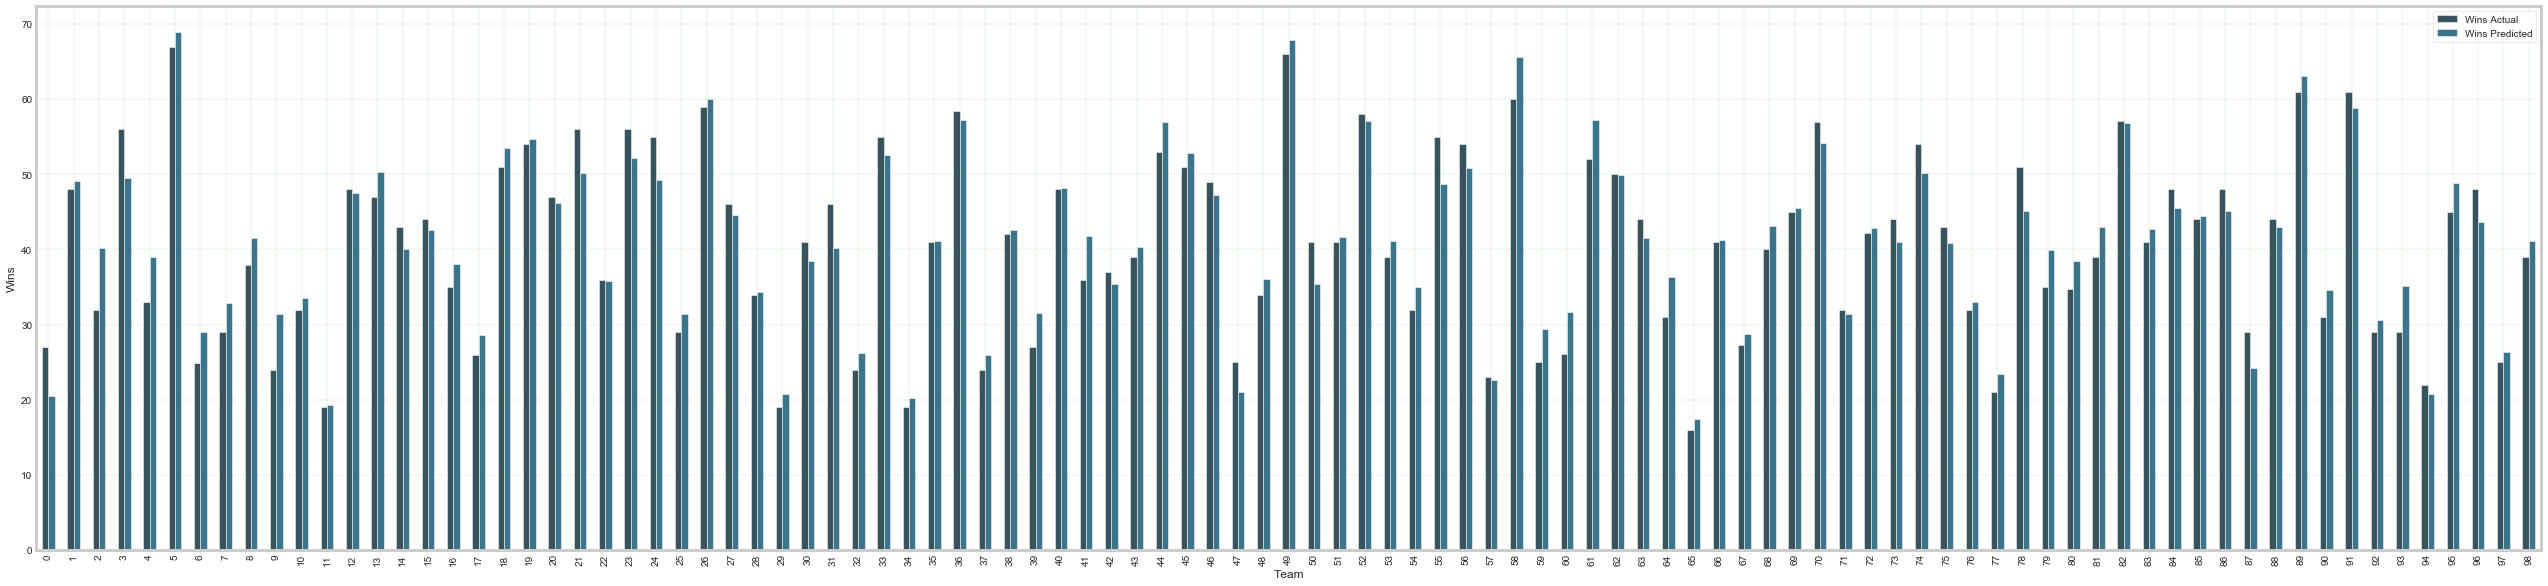

In [739]:
# bar plot comparing actual wins and predicted wins

sns.diverging_palette(255, 133, l=60, n=7, center="dark")

wins_comparison.plot(kind='bar',figsize=(40,10)).get_figure().savefig('wins_comparison.png')
plt.grid(which='major', linestyle='-', linewidth='0.1', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.1', color='black')
plt.xlabel('Team')
plt.ylabel('Wins')

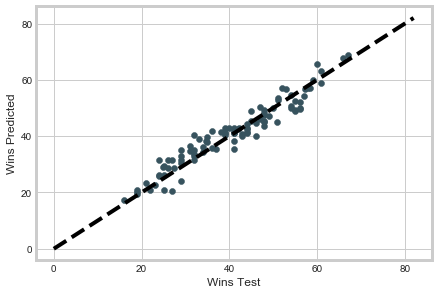

In [743]:
# scatter plot comparing actual wins to predicted wins

plt.plot([0, 82], [0, 82], '--k')
plt.axis('tight')
plt.tight_layout()
plt.xlabel('Wins Test')
plt.ylabel('Wins Predicted')
plt.scatter(x = y_wins_test_pd, y = y_wins_pred_pd).get_figure().savefig('wins_scatter.png')

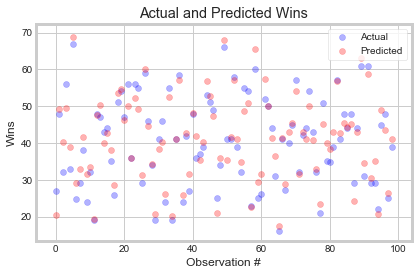

In [674]:
_, ax = plt.subplots()

ax.scatter(x = range(0, y_wins_test_pd.size), y=y_wins_test_pd, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_wins_pred_pd.size), y=y_wins_pred_pd, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and Predicted Wins')
plt.xlabel('Observation #')
plt.ylabel('Wins')
plt.legend()
plt.show()

In [626]:
print('R^2:', metrics.r2_score(y_wins_test_pd, y_wins_pred_pd))  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_wins_test_pd, y_wins_pred_pd))  
print('Mean Squared Error:', metrics.mean_squared_error(y_wins_test_pd, y_wins_pred_pd))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_wins_test_pd, y_wins_pred_pd)))

R^2: 0.9228803913857021
Mean Absolute Error: 2.7580185512876088
Mean Squared Error: 11.398338744563585
Root Mean Squared Error: 3.37614258356539


### The model explains ~92.62% of the variation in wins

In [695]:
import regressors
from regressors import stats


# To calculate the p-values of beta coefficients: 

print("coef_pval:\n", stats.coef_pval(regressor, x_train_norm, y_wins_train))


coef_pval:
 [2.39312042e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.18551706e-04 0.00000000e+00 7.01438846e-07
 4.28177262e-01]


In [723]:
# performing the regression with the statsmodel package

import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


m = eda_data.iloc[:,0:8]
n = eda_data.iloc[:,8:9]

m2 = sm.add_constant(m)
est = sm.OLS(n, m2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   WINS   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     623.7
Date:                Wed, 20 May 2020   Prob (F-statistic):          1.52e-190
Time:                        03:40:15   Log-Likelihood:                -844.05
No. Observations:                 330   AIC:                             1706.
Df Residuals:                     321   BIC:                             1740.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -45.7785     12.347     -3.708      0.0

#### According to the our OLS model, a **1% increase in effective field goal %** is associated with an **average increase of 3.8626 wins**

#### According to the our OLS model, a **1% increase in turnover %** is associated with an **average decrease of 3.7176 wins**

#### According to the our OLS model, a **1% increase in offensive rebound %** is associated with an **average increase of 1.1133 wins**

#### According to the our OLS model, a **1 unit increase in free throw factor** is associated with an **average increase of 0.7488 wins**

#### All features have significant p-values

#### If we average the absolute values of each of the four factors from the summary table, we can find weightings for each of the four factors and compare them to those proposed by Dean Oliver

In [746]:
sum_coeff_all_features = (3.8626 + 3.7176 + 1.1133 + 0.7488 + 3.8403 + 3.0474 + 0.9071 + 0.8152)
sum_coeff_all_features

18.0523

In [755]:
sum_coeff_eFG = (3.8626 + 3.8403)
weight_eFG = [100* (sum_coeff_eFG / sum_coeff_all_features)] 
weight_eFG

[42.66990909745573]

In [756]:
sum_coeff_TOV = (3.7176 + 3.0474)
weight_TOV = [100* (sum_coeff_TOV / sum_coeff_all_features)] 
weight_TOV

[37.47444923915513]

In [757]:
sum_coeff_OREB = (1.1133 + 0.9071)
weight_OREB = [100* (sum_coeff_OREB / sum_coeff_all_features)] 
weight_OREB

[11.1919256826]

In [758]:
sum_coeff_FTF = (0.7488 + 0.8152)
weight_FTF = [100* (sum_coeff_FTF / sum_coeff_all_features)] 
weight_FTF

[8.663715980789153]

#### We get weightings of **42.67 / 37.47 / 11.19 / 8.66** as compared to the **40 / 25 / 20 / 15** proposed by Oliver